In [ ]:
#parameter: 
#the number of layers, 
#the number of hidden units per layer (start w 1 or 2 hidden layers and possible expend from there)
#MLPClassifier (multilayer perceptron)
#Features w low weights: less important features or we didn't represent them in a way that NN could use 


In [1]:
#introduction to machinelearning with python p87 
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
#from sklearn.learning_curve import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve, auc

from time import time
from scipy import stats
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPClassifier
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, stratify = digits.target, random_state=0)

mlp = MLPClassifier(random_state = 0)
mlp.fit(X_train, y_train)
print(mlp.get_params)
print("MLP train score: {:.3f}".format(mlp.score(X_train, y_train)))
print("MLP test score: {:.3f}".format(mlp.score(X_test, y_test)))

<bound method BaseEstimator.get_params of MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)>
MLP train score: 1.000
MLP test score: 0.960


In [8]:
print("-----------------------")
mlp_final = MLPClassifier(max_iter = 1000, activation = 'tanh', random_state = 0)
start = time()
mlp_final.fit(X_train, y_train)
print("time took: %.3f seconds "%(time() - start))  #after fitting
print("MLP final score - training (tanh) : {:.3f}".format(mlp_final.score(X_train, y_train)))
print("MLP final score - test (tanh) : {:.3f}".format(mlp_final.score(X_test, y_test)))

-----------------------
time took: 2.978 seconds 
MLP final score - training (tanh) : 1.000
MLP final score - test (tanh) : 0.971


### Grid Search

In [2]:
#parameters = {'solver': ['lbfgs'], 
#'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 
#'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15)}

#parameters = {'solver': ['lbfgs'], 
#'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 
#'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15)}
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")   

#---------------------------------------------------------------------------------------------
param_grid = {#'learning_rate': ['constant','invscaling','adaptive'],
              'hidden_layer_sizes': [(10,10,10), (100,)],# (50,100,50),
              #'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'activation': ['tanh', 'relu'],
              #'solver': ['lbfgs','sgd','adam'],
              'solver': ['sgd', 'adam'],
              'alpha': [0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]}
              #'alpha': 10.0 ** -np.arange(1, 7)}
              #'max_iter': np.arange(1100, 5200, 1000)}
"""
param_grid = {#'learning_rate': ['constant','invscaling','adaptive'],
              #'hidden_layer_sizes': [(10,10,10), (100,)],# (50,100,50),
              #'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'activation': ['tanh', 'relu'],
              'solver': ['lbfgs','sgd','adam'],
              #'solver': ['sgd', 'adam'],
              'alpha': [0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]}
              #'alpha': 10.0 ** -np.arange(1, 7)}
               #'max_iter': np.arange(1100, 5200, 1000)}
               
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],"""
mlp = MLPClassifier(max_iter = 5000, random_state = 0)    
grid_search = GridSearchCV(mlp, param_grid = param_grid, cv = 5)
start = time()
grid_search.fit(X_train, y_train)
print("***GridSearchCV took %.2f seconds for %d candidates parameter settings."
      %((time() - start), len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

***GridSearchCV took 996.20 seconds for 48 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.981 (std: 0.005)
Parameters: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'solver': 'adam'}

Model with rank: 2
Mean validation score: 0.981 (std: 0.006)
Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'solver': 'adam'}

Model with rank: 2
Mean validation score: 0.981 (std: 0.006)
Parameters: {'activation': 'tanh', 'alpha': 0.005, 'hidden_layer_sizes': (100,), 'solver': 'adam'}

Model with rank: 2
Mean validation score: 0.981 (std: 0.006)
Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}

Model with rank: 5
Mean validation score: 0.980 (std: 0.005)
Parameters: {'activation': 'tanh', 'alpha': 0.0005, 'hidden_layer_sizes': (100,), 'solver': 'adam'}

Model with rank: 5
Mean validation score: 0.980 (std: 0.007)
Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_l

### Validation Curve

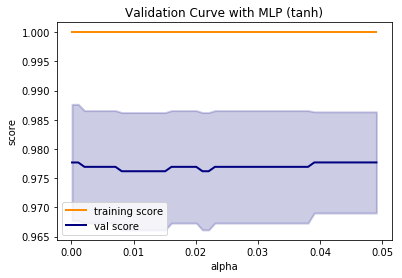

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[0.97768791 0.97768791 0.97693997 0.97693997 0.97693997 0.97693997
 0.97693997 0.97693997 0.97618809 0.97618809 0.97618809 0.97618809
 0.97618809 0.97618809 0.97618809 0.97618809 0.97693997 0.97693997
 0.97693997 0.97693997 0.97693997 0.97618809 0.97618809 0.97693997
 0.97693997 0.97693997 0.97693997 0.97693997 0.97693997 0.97693997
 0.97693997 0.97693997 0.97693997 0.97693997 0.97693997 0.97693997
 0.97693997 0.97693997 0.97693997 0.97769582 0.97769582 0.97769582
 0.97769582 0.97769582 0.97769582 0.97769582 0.97769582 0.97769582
 0.97769582 0.97769582]
[0.0001 0.0011 0.0021 0.0031 0.0041 0.0051 0.0061 0.0071 0.0081 0.0091
 0.0101 0.0111 0.0121 0.0131 0.0141 0.0151 0.0161 0.0171 0.0181 0.0191
 0.0201 0.0211 0.0221 0.0231 0.0241 0.0251 0.0261 0.0271 0.0281 0.0291
 0.0301 0.0311 0.0321 0.0331 0.0341 0.0351 0.0361 0.0371 0.0381 0.0391
 0

In [3]:
alpha =  np.arange ( 0.0001, 0.05, 0.001)
training_score, val_score = validation_curve(MLPClassifier(max_iter = 5000, activation = 'tanh', random_state = 0), #'relu' 
                                             X_train, y_train,
                                             param_name = "alpha", 
                                             param_range = alpha, cv= 7)
## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("Validation Curve with MLP (tanh)") 
plt.xlabel("alpha")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(alpha, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(alpha, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(alpha, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(alpha, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend()
plt.show()    
print(train_score_mean)
print(val_score_mean)
print(alpha)

### Learning Curve

<module 'matplotlib.pyplot' from 'c:\\users\\nfleming\\appdata\\local\\programs\\python\\python37-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

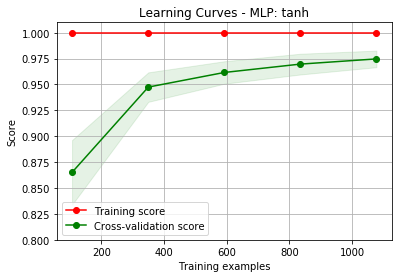

In [7]:
#learning curve
def plot_learning_curve (estimator, title, X,y, ylim = None, cv = None, 
                         n_jobs = None, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim (*ylim)
    plt.xlabel ("Training examples")
    plt.ylabel ("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.1, color = "r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g", label = "Cross-validation score")
    plt.legend(loc ="best")
    return plt

X, y = X_train, y_train

title = "Learning Curves - MLP: tanh"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = mlp_final
plot_learning_curve(estimator, title, X, y, ylim = (0.8, 1.01), cv = cv, n_jobs = 4)